## Week 3 Homework

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import accuracy_score, mean_squared_error

In [2]:
# Pre processing
df = pd.read_csv('housing.csv')

df = df[['latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value',
    'ocean_proximity']]
# Fill missing values
df = df.fillna(0)



df['rooms_per_household'] =  df['total_rooms'] /df['households'] 
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household']= df['population']/ df['households']

In [3]:
# Question 1
df['ocean_proximity'].mode()


0    <1H OCEAN
Name: ocean_proximity, dtype: object

<AxesSubplot:>

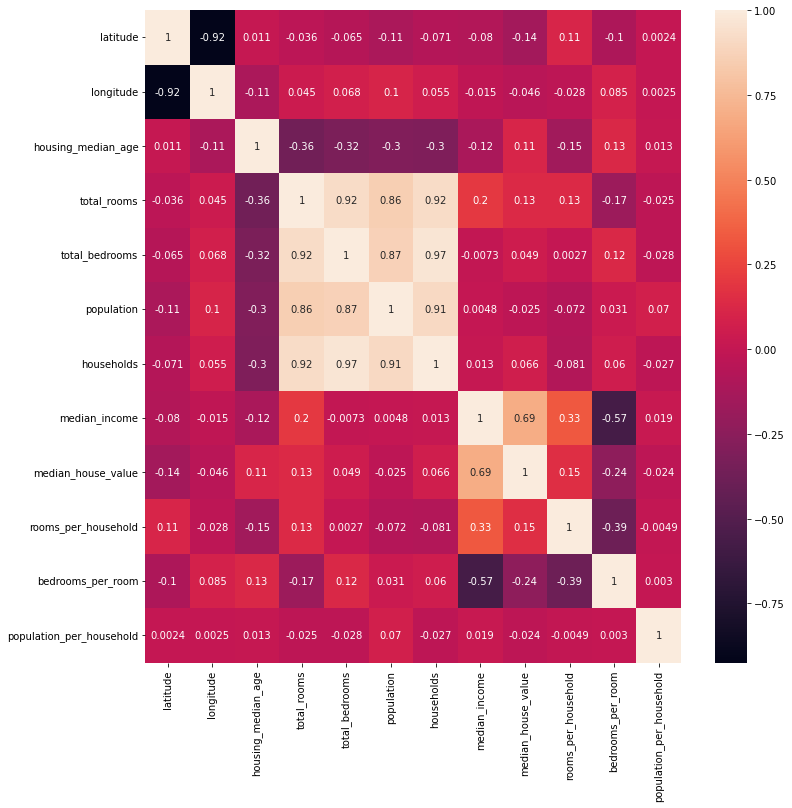

In [29]:
# Question 2
numeric = ['latitude', 'longitude','housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household']
categoric = ['ocean_proximity']
plt.figure(figsize=(12,12))
sns.heatmap(df[numeric].corr(), annot=True)

In [67]:
# Question 3
df['above_average'] = np.where(df['median_house_value'] > df['median_house_value'].mean(), 1, 0)

X = df.drop(columns=['median_house_value', 'above_average'])
y = df["above_average"]
# Split into test and train at 60/40
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# now split into train and validation to give 60/20/20 split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

# Calculate mutual information score
round(mutual_info_score(df['ocean_proximity'], df['above_average']),2)

0.1

In [68]:
# Question 4 

numeric = ['latitude', 'longitude','housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household']
categoric = ['ocean_proximity']
# One hot encode categoricals using a dict vectorizer
train_dict = X_train[categoric + numeric].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)

# One hot encode validation data for model metrics
val_dict = X_val[categoric + numeric].to_dict(orient='records')
X_val = dv.transform(val_dict)

# Train and fit a logistic regression model
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# get predicted values and accuracy scores
y_pred = model.predict(X_val)
main_accuracy = accuracy_score(y_val, y_pred)
print(f' accuracy is: {round(accuracy_score(y_val, y_pred),2)}')

 accuracy is: 0.83


In [ ]:
# Question 5
numeric = ['latitude', 'longitude','housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household']
categoric = ['ocean_proximity']
# One hot encode categoricals using a dict vectorizer
train_dict = X_train[categoric + numeric].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)

# One hot encode validation data for model metrics
val_dict = X_val[categoric + numeric].to_dict(orient='records')
X_val = dv.transform(val_dict)

# Train and fit a logistic regression model
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# get predicted values and accuracy scores
y_pred = model.predict(X_val)
main_accuracy = accuracy_score(y_val, y_pred)
print(f' accuracy is: {round(accuracy_score(y_val, y_pred),2)}')

In [92]:
# Question 6

X = df.drop(columns=['median_house_value', 'above_average'])
y = np.log(df['median_house_value'])




a = [0, 0.01, 0.1, 1, 10]
for value in a:
    # Split into test and train at 60/40
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

    # now split into train and validation to give 60/20/20 split
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

    # One hot encode categoricals using a dict vectorizer
    train_dict = X_train[categoric + numeric].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)
    X_train = dv.transform(train_dict)

    model = Ridge(alpha=value, solver="sag", random_state=42)
    model.fit(X_train, y_train)

    # One hot encode validation data for model metrics
    val_dict = X_val[categoric + numeric].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    print(f"{value} RMSE is; {round(mean_squared_error(y_val, y_pred, squared=False),3)}")

0 RMSE is; 0.532
0.01 RMSE is; 0.532
0.1 RMSE is; 0.532
1 RMSE is; 0.532
10 RMSE is; 0.532
